In [ ]:
## reading debug.json
import json
f=open("../build/debug.json")
data=json.load(f)
## iterations
num_iter=len(data["obj"])
## data
obj=data["obj"]
constrain1=data["constrain1"]
time_eq=data["time_eq"]
time_mma=data["time_mma"]
volfrac=data["volfrac"]
config=data["config"]

"plot(idx,eq,color='green',label='equation')\nplot(idx,mma,color='blue',label='mma')\n#plot(idx,total,color='red',label='total')\nplt.legend()"

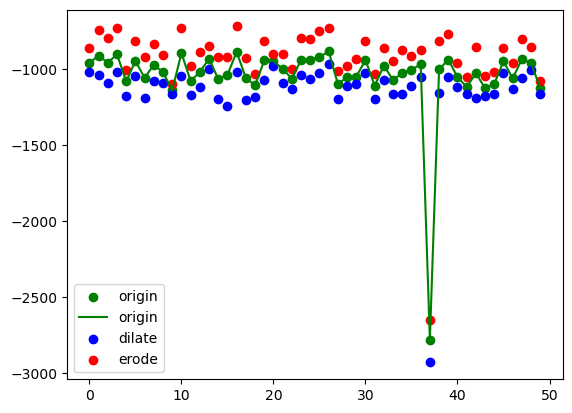

In [13]:
import json
import numpy as np
import os
from os.path import join
from pylab import *
from matplotlib import pyplot as plt
num=50
idx=np.linspace(0,num-1,num)
org=np.zeros(num)
erd=np.zeros(num)
dlt=np.zeros(num)
mma=np.zeros(num)
eq=np.zeros(num)
total=np.zeros(num)

root=os.path.abspath("../build/data_bulk64/")

for i in range(50):
    target_file=join(root,str(i))+"/debug.json"
    f=open(target_file)
    data=json.load(f)
    num_iter=len(data["origin"])-1
    org[i]=np.array(data["origin"])[num_iter]
    erd[i]=np.array(data["erode"])[num_iter]
    dlt[i]=np.array(data["dilate"])[num_iter]
    eq[i]=sum(np.array(data["time_eq"]))/(num_iter+1)
    mma[i]=sum(np.array(data["time_mma"]))/(num_iter+1)
    total[i]=(eq[i]+mma[i])*(num_iter+1)
scatter(idx,org,color='green',label='origin')
plot(idx,org,color='green',label='origin')
scatter(idx,dlt,color='blue',label='dilate')
scatter(idx,erd,color='red',label='erode')
plt.legend()
'''plot(idx,eq,color='green',label='equation')
plot(idx,mma,color='blue',label='mma')
#plot(idx,total,color='red',label='total')
plt.legend()'''

In [23]:
import os
from os.path import join
import json
root=os.path.abspath("../build/data_npr/")
target_file=join(root,str(i))+"/debug.json"
f=open(target_file)
data=json.load(f)
num_iter=len(data["origin"])
print(data["origin"][num_iter-1])
print(target_file)

-0.5671860575675964
/media/mezzrow/585b9bb8-4d7e-402b-9c83-1f14cdf6c416/homo3d/build/data_npr/99/debug.json


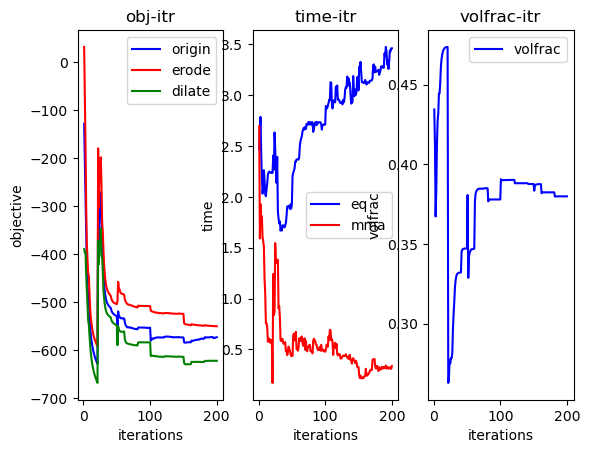

time cost : 0.0 hours 10.0 minutes 56 s


In [11]:
## reading debug.json
import json
from pylab import *
from matplotlib import pyplot as plt
import numpy as np
import time as time
%matplotlib inline

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
#f=open("../build/data_shear64/0/debug.json")
f=open("../build/debug.json")
data=json.load(f)
max_iters=500
iter=len(data["origin"])-1
num_iter=iter
while iter<max_iters and iter<=num_iter:
    #f=open("../build/debug.json")
    #data=json.load(f)
    ## iterations
    num_iter=len(data["origin"])
    ## data
    origin=data["origin"]
    erode=data["erode"]
    dilate=data["dilate"]
    time_eq=data["time_eq"]
    time_mma=data["time_mma"]
    volfrac=data["volfrac"]
    config=data["config"]
    
    if is_ipython:
        display.clear_output(wait=True)
    
    if iter==1:
        ## print config
        print("config:")
        print(config)
    
    ## plot   
    ## turn list to numpy arrays
    origin=np.array(origin)
    erode=np.array(erode)
    time_eq=np.array(time_eq)
    time_mma=np.array(time_mma)
    volfrac=np.array(volfrac)
    iters=np.arange(1,num_iter+1,1)
    ## plot obj-itr
    plt.subplot(131)
    plt.xlabel("iterations")
    plt.ylabel("objective")
    plt.title("obj-itr")
    plot(iters,origin,color="blue",label="origin")
    plot(iters,erode,color="red",label="erode")
    plot(iters,dilate,color="green",label="dilate")
    plt.legend()
    ## plot time-itr
    plt.subplot(132)
    plt.xlabel("iterations")
    plt.ylabel("time")
    plt.title("time-itr")
    plot(iters,time_eq,color="blue",label="eq")
    plot(iters,time_mma,color="red",label="mma")
    plt.legend()
    ## plot volfrac
    plt.subplot(133)
    plt.xlabel("iterations")
    plt.ylabel("volfrac")
    plt.title("volfrac-itr")
    plot(iters,volfrac,color="blue",label="volfrac")
    plt.legend()
    
    plt.show()
    
    time_cost=sum(time_eq)+sum(time_mma)
    time_hour=time_cost//3600
    time_minute=(time_cost%3600)//60
    time_second=int(time_cost-time_hour*3600-time_minute*60)
    
    print(f"time cost : {time_hour} hours {time_minute} minutes {time_second} s")
    
    ## block
    #ime.sleep(time_eq[iter-1]+time_mma[iter-1])
    time.sleep(time_eq[-1]+time_mma[-1])
    
    
    
    ## iter++
    iter+=1

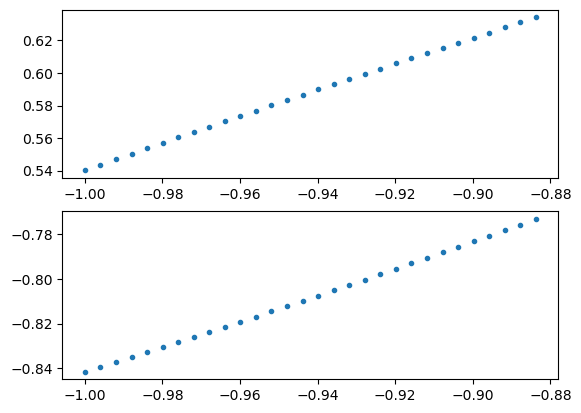

In [ ]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

def plot_durations(x, y1, y2):
    #plt.figure(2)
#     plt.clf() 此时不能调用此函数，不然之前的点将被清空。
    plt.subplot(211)
    plt.plot(x, y1, '.')
    plt.subplot(212)
    plt.plot(x, y2, '.')

    plt.pause(0.1)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        #display.display(plt.gcf())
x = np.linspace(-1,1,500)
y1=np.cos(x)
y2=np.sin(x)
for i in np.arange(1,500,1):
    plot_durations(x[0:i], y1[0:i], y2[0:i])



In [2]:
import numpy as np
x=np.linspace(-1,1,5)
print(x)
print(np.arange(1,2,1))
print(np.cos(x[0:3]))
print(x[-1])

[-1.  -0.5  0.   0.5  1. ]
[1]
[0.54030231 0.87758256 1.        ]
1.0


In [11]:
import numpy as np
x={1,2,3}
y=sum(x)
print(f"array: {y}")

array: 6


1.0000634688000003


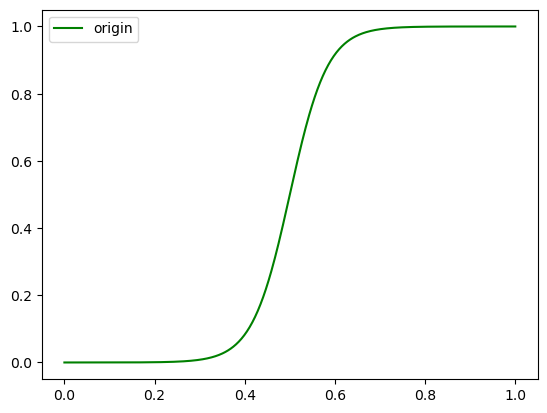

In [34]:
from pylab import *
from matplotlib import pyplot as plt
def Erd(beta):
    return [lambda x:np.exp(-beta*(1-x))-(1-x)*np.exp(-beta),lambda x:beta*np.exp(-beta*(1-x))+np.exp(beta)]

def Dlt(beta):
    return [lambda x:1-np.exp(-beta*x)+x*np.exp(-beta),lambda x:beta*np.exp(-beta*x)+np.exp(-beta)]

def Tanh(beta,eta):
    return lambda x:(tanh(beta*eta)+tanh(beta*(x-eta)))/(tanh(beta*eta)+tanh(beta*(1-eta)))

def TanhDiff(beta,eta):
    return lambda x:beta/(cosh(beta*(x-eta))**2*(tanh(beta*eta)+tanh(beta*(1-eta))))
                     
#plot(x,Erd(16)(x),color='blue')
#plot(x,Erd(4)(x),color='red')
x=np.linspace(0,1,500)
b_=12
[erd,erd_]=Erd(b_)
if(0):
    plot(x,erd_(x),color='red')
    #plot(x,(b_*x**(b_-1)),color='blue')
elif(0):
    plot(x,erd(x),color='red')
    plot(x,(x**b_),color='blue')
    
[dlt,dlt_]=Dlt(b_)
x=np.linspace(0,1,500)
_tanh=Tanh(b_,0.5)
_tanhe=Tanh(b_,0.7)
_tanhd=Tanh(b_,0.3)
tanh_=TanhDiff(3,0.5)
polyn=lambda x:-(2.1333)*x**3+(15.2)*x**2-(0.0666)*x+0.0001
polyn_=lambda x:-(6.3999)*x**2+(30.4)*x-(0.0666)
poly=lambda x:-(32/15)*x**3+(16/5)*x**2-(1/15)*x
poly_=lambda x:-(32/5)*x**2+(32/5)*x-(1/15)
if(0):
    plot(x,dlt_(x),color='red')
    plot(x,(-b_*(1-x)**(b_-1)),color='blue')
elif(1):
   # plot(x,erd(x),color='green')
   # plot(x,(x**b_),color='yellow')
    #plot(x,dlt(x),color='red')
    #plot(x,(1-(1-x)**b_),color='blue')
    #plot(x,tanh_(x),color='green')
    plot(x,_tanh(x),color='green',label='origin')
   # plot(x,_tanhd(x),color='red',label='dilate')
   # plot(x,_tanhe(x),color='blue',label='erode')
    #plot(x,x**3,color='green')
    plt.legend()
    #plot(x,x**2,color='orange')
    #plot(x,(x**3+(1-x)**3)/2,color='orange')
    #plot(x,poly(x),color='orange')
   # plot(x,poly_(x),color='black')
print(poly(0.999))